<a href="https://colab.research.google.com/github/ndohvich/Projet_6_IBM/blob/main/tp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#installation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
import numpy as np
%matplotlib inline

In [36]:
#récupération des données en ligne
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
#récupération et transformation en dataframe
data = pd.read_csv(url, header=None)

In [37]:
#affichage des premiers éléments
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [38]:
#n'ayant pas de colonnes définies nous allons créer celà
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
#affectation des entêtes
data.columns=headers
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [39]:
#sauvegarde du nouveau dataframe
path="/content/automobile.csv"
data.to_csv(path)

In [40]:
#il nous permet de determiner le type des données afin de savoir quelle propr donnée à la colonne
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [41]:
#resumé statistique de chaque colonne
data.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [42]:
#il nous permet aussi d'avoir des informations sur les 30 premières et 30 dernières données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

#Lancement de la semaine 2

In [43]:
import numpy as np
#identification des valeurs manquantes
# replace "?" to NaN
data.replace("?", np.nan, inplace = True)
data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [44]:
#Evaluation des données manquantes
missing_data = data.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
#determinons le nombre de valeurs manquantes par colonne
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [46]:
data.head(100)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,128,nissan,gas,std,two,hatchback,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7799
96,1,122,nissan,gas,std,four,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7499
97,1,103,nissan,gas,std,four,wagon,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7999
98,2,168,nissan,gas,std,two,hardtop,fwd,front,95.1,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,8249


In [47]:
avg_normalized_losses = data['normalized-losses'].astype('float').mean(axis=0)
data["normalized-losses"].replace(np.nan, avg_normalized_losses, inplace=True)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [48]:
#conversion des données au format approprié bore et stroke qui sont des description sur le moteur et doivent normalement être des nombres
data[["bore", "stroke"]] = data[["bore", "stroke"]].astype("float")
data[["normalized-losses"]] = data[["normalized-losses"]].astype("int")
data[["price"]] = data[["price"]].astype("float")
data[["peak-rpm"]] = data[["peak-rpm"]].astype("float")
data.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [49]:
#standardisation des données
data['city-L/100km'] = 235/data["city-mpg"]

# check your transformed data
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [50]:
data["highway-mpg"] = 235/data["highway-mpg"]
data.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


In [51]:
#normalisation des données
data['length'] = data['length']/data['length'].max()
data['height'] = data['height']/data['height'].max()
data['width'] = data['width']/data['width'].max()

In [52]:
#regroupement des données avec pandas
data[["horsepower"]]=data[["horsepower"]].astype(float, copy=True)

In [53]:
bins = np.linspace(min(data["horsepower"]), max(data["horsepower"]), 4)
bins

array([ 48., 128., 208., 288.])

In [54]:
group_names = ['low', 'medium', 'high']

In [55]:
data['horsepower-binned'] = pd.cut(data['horsepower'], bins, labels=group_names, include_lowest=True)
data[['horsepower', 'horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111.0,low
1,111.0,low
2,154.0,medium
3,102.0,low
4,115.0,low
5,110.0,low
6,110.0,low
7,110.0,low
8,140.0,medium
9,160.0,medium


In [56]:
data["horsepower-binned"].value_counts()

low       161
medium     40
high        2
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

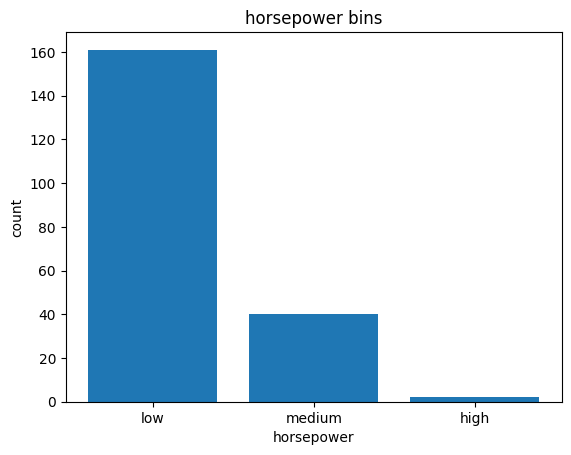

In [57]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, data["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

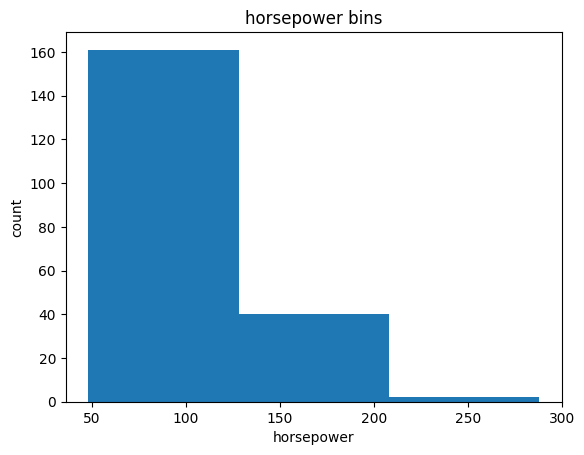

In [58]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(data["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [59]:
#indicateur de valeur
dummy_variable_1 = pd.get_dummies(data["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [60]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [61]:
data = pd.concat([data, dummy_variable_1], axis=1)
data.drop("fuel-type", axis=1, inplace=True)
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,8.703704,13495.0,11.190476,low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,8.703704,16500.0,11.190476,low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,9.038462,16500.0,12.368421,medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,7.833333,13950.0,9.791667,low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,10.681818,17450.0,13.055556,low,0,1


In [62]:
dummy_variable_2 = pd.get_dummies(data["aspiration"])
dummy_variable_2.rename(columns={'std':'aspiration-type-std', 'turbo':'aspiration-type-turbo'}, inplace=True)
data = pd.concat([data, dummy_variable_2], axis=1)
data.drop("aspiration", axis=1, inplace=True)
data.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-type-std,aspiration-type-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,5000.0,21,8.703704,13495.0,11.190476,low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,5000.0,21,8.703704,16500.0,11.190476,low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.905947,...,5000.0,19,9.038462,16500.0,12.368421,medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.915629,...,5500.0,24,7.833333,13950.0,9.791667,low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.918396,...,5500.0,18,10.681818,17450.0,13.055556,low,0,1,1,0


In [63]:
data.to_csv('clean_df.csv')

#lancemenet de la semaine 3

In [64]:
data.describe(include="all")

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-type-std,aspiration-type-turbo
count,205.000000,205.000000,205,203,205,205,205,205.000000,205.000000,205.000000,...,203.000000,205.000000,205.000000,201.000000,205.000000,203,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,22,2,5,3,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,four,sedan,fwd,front,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,low,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,114,96,120,202,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,161,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,98.756585,0.836373,0.911588,...,5125.369458,25.219512,8.034347,13207.129353,9.949525,NaN,0.097561,0.902439,0.819512,0.180488
std,1.245307,31.681008,NaN,NaN,NaN,NaN,NaN,6.021776,0.059285,0.029671,...,479.334560,6.542142,1.849782,7947.066342,2.573104,NaN,0.297446,0.297446,0.385535,0.385535
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,0.834025,...,4150.000000,13.000000,4.351852,5118.000000,4.795918,NaN,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.000000,NaN,NaN,NaN,NaN,NaN,94.500000,0.799135,0.886584,...,4800.000000,19.000000,6.911765,7775.000000,7.833333,NaN,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.000000,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,0.905947,...,5200.000000,24.000000,7.833333,10295.000000,9.791667,NaN,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.000000,NaN,NaN,NaN,NaN,NaN,102.400000,0.879865,0.925311,...,5500.000000,30.000000,9.400000,16500.000000,12.368421,NaN,0.000000,1.000000,1.000000,0.000000


In [65]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-type-std,aspiration-type-turbo
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,...,203.000000,203.000000,205.000000,205.000000,201.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,0.836373,0.911588,0.898409,2555.565854,126.907317,3.329751,3.255423,...,104.256158,5125.369458,25.219512,8.034347,13207.129353,9.949525,0.097561,0.902439,0.819512,0.180488
std,1.245307,31.681008,6.021776,0.059285,0.029671,0.040862,520.680204,41.642693,0.273539,0.316717,...,39.714369,479.334560,6.542142,1.849782,7947.066342,2.573104,0.297446,0.297446,0.385535,0.385535
min,-2.000000,65.000000,86.600000,0.678039,0.834025,0.799331,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.000000,94.500000,0.799135,0.886584,0.869565,2145.000000,97.000000,3.150000,3.110000,...,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.000000,97.000000,0.832292,0.905947,0.904682,2414.000000,120.000000,3.310000,3.290000,...,95.000000,5200.000000,24.000000,7.833333,10295.000000,9.791667,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.000000,102.400000,0.879865,0.925311,0.928094,2935.000000,141.000000,3.590000,3.410000,...,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,288.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000


In [66]:
drive_wheels_counts=data["drive-wheels"].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,120
rwd,76
4wd,9


In [67]:
data.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-type-std,aspiration-type-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,5000.0,21,8.703704,13495.0,11.190476,low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,5000.0,21,8.703704,16500.0,11.190476,low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.905947,...,5000.0,19,9.038462,16500.0,12.368421,medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.915629,...,5500.0,24,7.833333,13950.0,9.791667,low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.918396,...,5500.0,18,10.681818,17450.0,13.055556,low,0,1,1,0


In [68]:
data.describe(include="all")

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-type-std,aspiration-type-turbo
count,205.000000,205.000000,205,203,205,205,205,205.000000,205.000000,205.000000,...,203.000000,205.000000,205.000000,201.000000,205.000000,203,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,22,2,5,3,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,four,sedan,fwd,front,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,low,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,114,96,120,202,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,161,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,98.756585,0.836373,0.911588,...,5125.369458,25.219512,8.034347,13207.129353,9.949525,NaN,0.097561,0.902439,0.819512,0.180488
std,1.245307,31.681008,NaN,NaN,NaN,NaN,NaN,6.021776,0.059285,0.029671,...,479.334560,6.542142,1.849782,7947.066342,2.573104,NaN,0.297446,0.297446,0.385535,0.385535
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,0.834025,...,4150.000000,13.000000,4.351852,5118.000000,4.795918,NaN,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.000000,NaN,NaN,NaN,NaN,NaN,94.500000,0.799135,0.886584,...,4800.000000,19.000000,6.911765,7775.000000,7.833333,NaN,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.000000,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,0.905947,...,5200.000000,24.000000,7.833333,10295.000000,9.791667,NaN,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.000000,NaN,NaN,NaN,NaN,NaN,102.400000,0.879865,0.925311,...,5500.000000,30.000000,9.400000,16500.000000,12.368421,NaN,0.000000,1.000000,1.000000,0.000000


In [69]:
print(data.dtypes)

symboling                   int64
normalized-losses           int64
make                       object
num-of-doors               object
body-style                 object
drive-wheels               object
engine-location            object
wheel-base                float64
length                    float64
width                     float64
height                    float64
curb-weight                 int64
engine-type                object
num-of-cylinders           object
engine-size                 int64
fuel-system                object
bore                      float64
stroke                    float64
compression-ratio         float64
horsepower                float64
peak-rpm                  float64
city-mpg                    int64
highway-L/100km           float64
price                     float64
city-L/100km              float64
horsepower-binned        category
fuel-type-diesel            uint8
fuel-type-gas               uint8
aspiration-type-std         uint8
aspiration-typ

In [70]:
data.corr()

<ipython-input-70-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-type-std,aspiration-type-turbo
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.134205,-0.008965,...,0.071622,0.274573,-0.035823,-0.030190,-0.082391,0.063165,-0.194311,0.194311,0.059866,-0.059866
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029497,0.055363,...,0.203434,0.237748,-0.218749,0.178527,0.133999,0.232682,-0.101437,0.101437,0.006823,-0.006823
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.490378,0.161477,...,0.352297,-0.361052,-0.470414,0.578128,0.584642,0.474040,0.308346,-0.308346,-0.257611,0.257611
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.607480,0.129739,...,0.555003,-0.287325,-0.670909,0.711597,0.690628,0.659165,0.212679,-0.212679,-0.234539,0.234539
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559204,0.182956,...,0.642482,-0.219957,-0.642704,0.728044,0.751265,0.682850,0.233880,-0.233880,-0.300567,0.300567
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.176195,-0.056999,...,-0.110711,-0.322272,-0.048640,0.085892,0.135486,-0.002333,0.284631,-0.284631,-0.087311,0.087311
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.649045,0.168929,...,0.751034,-0.266306,-0.757414,0.836742,0.834415,0.791911,0.217275,-0.217275,-0.324902,0.324902
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.594090,0.206675,...,0.810773,-0.244618,-0.653658,0.777077,0.872335,0.744952,0.069594,-0.069594,-0.108217,0.108217
bore,-0.134205,-0.029497,0.490378,0.607480,0.559204,0.176195,0.649045,0.594090,1.000000,-0.055909,...,0.577273,-0.264269,-0.594584,0.559794,0.543436,0.570686,0.054516,-0.054516,-0.213090,0.213090
stroke,-0.008965,0.055363,0.161477,0.129739,0.182956,-0.056999,0.168929,0.206675,-0.055909,1.000000,...,0.090254,-0.071493,-0.042906,0.056222,0.082310,0.043677,0.242081,-0.242081,-0.223460,0.223460


AttributeError: ignored

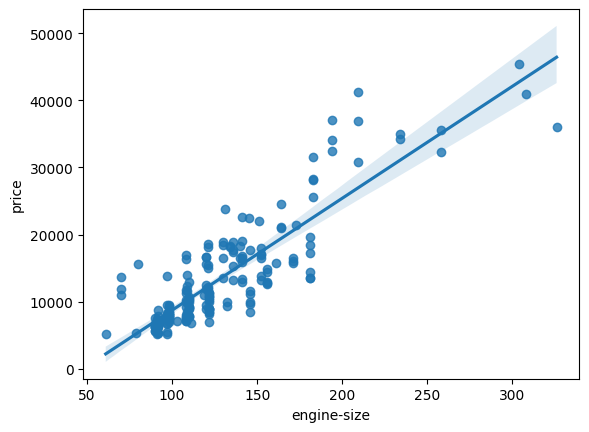

In [71]:
#déterminons la relation entre la taille du moteur et le prix nous constatons une corrélation linéaire positive entre les deux
sns.regplot(x="engine-size", y="price", data=data)
plt.ylim(0,)

<Axes: xlabel='highway-L/100km', ylabel='price'>

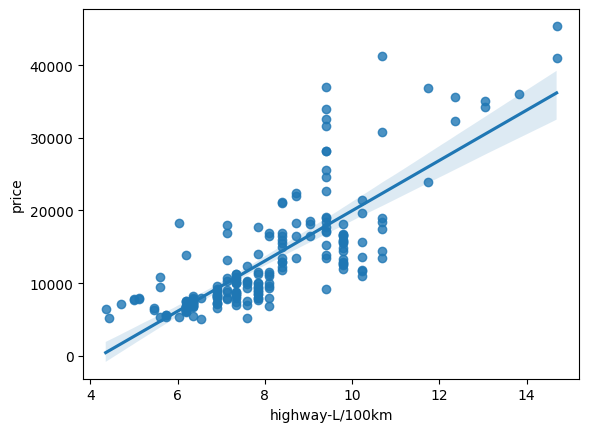

In [75]:
sns.regplot(x="highway-L/100km", y="price", data=data)

In [77]:
data[["stroke", "price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<Axes: xlabel='stroke', ylabel='price'>

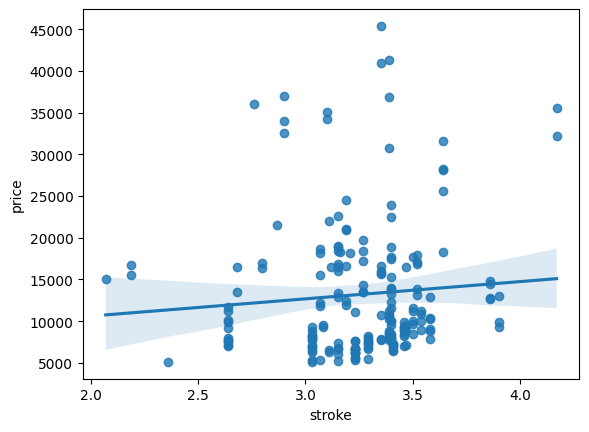

In [79]:
sns.regplot(x="stroke", y="price", data=data)

<Axes: xlabel='body-style', ylabel='price'>

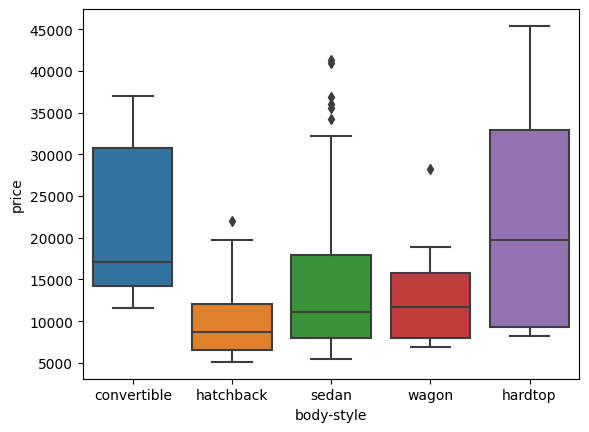

In [81]:
sns.boxplot(x="body-style", y="price", data=data)

<Axes: xlabel='engine-location', ylabel='price'>

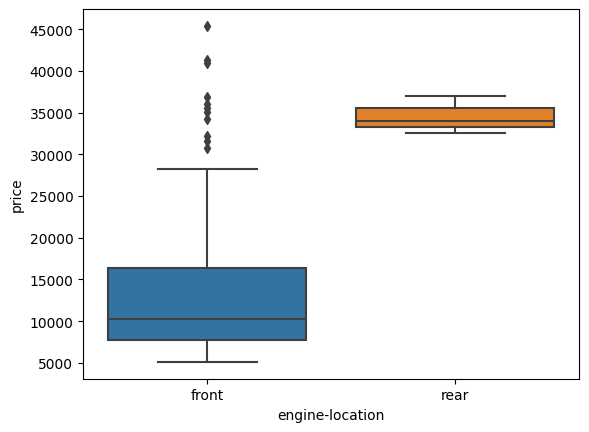

In [82]:
sns.boxplot(x="engine-location", y="price", data=data)

In [84]:
data.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205,203,205,205,205,205,205,205
unique,22,2,5,3,2,7,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,114,96,120,202,148,159,94


# Semaine 4